<a href="https://colab.research.google.com/github/Susmitha0211/Vehicle/blob/main/wrong_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import imread,imshow
dataset_path=os.listdir('/content/gdrive/My Drive/finalcars')
car_types=os.listdir('/content/gdrive/My Drive/finalcars')
car_types

['front', 'rear']

In [ ]:
cars=[]
for item in car_types:
  all_cars=os.listdir('/content/gdrive/My Drive/finalcars'+'/'+item)
  for car in all_cars:
    cars.append((item,str('finalcars'+'/'+item)+'/'+car))
df=pd.DataFrame(cars, columns=['side','images'])

print("Dataset for Training")
df

Dataset for Training


,side,images
0,front,finalcars/front/9.jpg
1,front,finalcars/front/28.jpg
2,front,finalcars/front/4.jpg
3,front,finalcars/front/16.jpg
4,front,finalcars/front/19.jpg
...,...,...
141,rear,finalcars/rear/2003.jpg
142,rear,finalcars/rear/133.jpg
143,rear,finalcars/rear/2016.jpg
144,rear,finalcars/rear/2007.jpg


In [ ]:
# load and iterate training dataset
import pandas as pd
train_it = datagen.flow_from_directory('/content/gdrive/My Drive/finalcars', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/gdrive/My Drive/final_validate', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)


Found 146 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [ ]:
history=model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 2.0089 - binary_accuracy: 0.4688

12/12 [==============================] - 54s 5s/step - loss: 2.0089 - binary_accuracy: 0.4688 - val_loss: 2.3323 - val_binary_accuracy: 0.4583
Epoch 2/10
12/12 [==============================] - 32s 3s/step - loss: 1.3067 - binary_accuracy: 0.5444
Epoch 3/10
12/12 [==============================] - 32s 3s/step - loss: 1.3027 - binary_accuracy: 0.6222
Epoch 4/10
12/12 [==============================] - 34s 3s/step - loss: 0.7674 - binary_accuracy: 0.7188
Epoch 5/10
12/12 [==============================] - 32s 3s/step - loss: 0.8894 - binary_accuracy: 0.6778
Epoch 6/10
12/12 [==============================] - 32s 3s/step - loss: 0.6386 - binary_accuracy: 0.7000
Epoch 7/10
12/12 [==============================] - 32s 3s/step - loss: 0.4872 - binary_accuracy: 0.7667
Epoch 8/10
12/12 [==============================] - 34s 3s/step - loss: 0.3845 - binary_accuracy: 0.8229
Epoch 9/10
12/12 [==============================] - 34s 3s/step - loss: 0.3667 - binary_accuracy: 0.8333
Epoch 10/10
12/12

In [ ]:
k=model.evaluate_generator(generator=valid_it,steps=4)
print(model.metrics_names[0], k[0]*100)

NameError: ignored

In [ ]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [ ]:
history.history.keys()
history.history.values()

dict_values([[0.47757962346076965, 0.6075516939163208, 0.30889543890953064, 0.25749731063842773, 0.4466592073440552], [0.8111110925674438, 0.7666666507720947, 0.8541666865348816, 0.855555534362793, 0.7777777910232544], [1.5263338088989258], [0.625]])

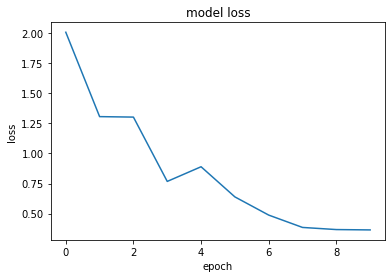

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

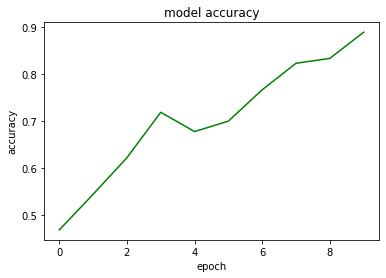

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'] ,'g')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [ ]:
import numpy as np
import warnings
from keras.models import Model
from keras.layers import Flatten 
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D 
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image 
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as X 
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input 
from keras.applications.imagenet_utils import obtain_input_shape

(224, 224)


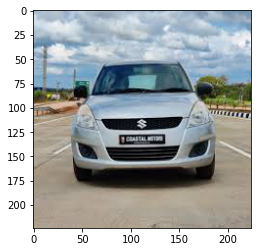

In [ ]:
from matplotlib.pyplot import imread,imshow
from tensorflow.keras.utils import load_img, img_to_array
import keras
from PIL import Image
img_path='v7.jpg'

image = Image.open('v7.jpg')
new_image = image.resize((224, 224))
print(new_image.size)
imshow(new_image)




In [ ]:
print(model.predict(x))

1/1 [==============================] - 1s 687ms/step
[[-2.0589397]]
